<a href="https://colab.research.google.com/github/MuHyeonSon/algorithm/blob/main/Algorithm_report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

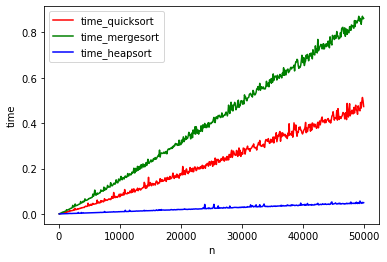

In [5]:
# 바이오메디컬공학부 손무현
# Algorithm Quick_sort, merge_sort, heap_sort
# 3개의 알고리즘에 대해 수행시간, 비교횟수(comparison), 교환횟수(swap) 비교 

import time, random
import matplotlib.pyplot as plt
import numpy as np
import timeit

##
## 여기에 세 가지 정렬함수를 위한 코드를...
##

########################################
def quick_sort(A,first,last):
	global Qs
	global Qc
	
	if first >= last : return
	#Qc += 1
	left, right = first+1, last
	pivot = A[first]
	while left <= right:
		#Qc += 1
		while left <= last and A[left] < pivot:
			Qc += 1
			left += 1
		while right > first and A[right] > pivot:
			Qc += 1
			right -= 1
		if left <= right :
			A[left], A[right] = A[right], A[left]
			Qs += 1
			left += 1
			right -= 1
		
	A[first], A[right] = A[right], A[first] # pivot을 맞는 자리에 넣기 (S,L사이)
	Qs += 1
	quick_sort(A, first, right-1)
	quick_sort(A, right+1, last)
########################################	
########################################
def merge_sort(B, first, last):
	global Ms
	global Mc
	
	if first >= last: return
	Mc += 1
	merge_sort(B, first, (first+last)//2)
	merge_sort(B, ((first+last)//2) + 1, last)
	merge_two_sorted_lists(B, first, last)
		
def merge_two_sorted_lists(B, first, last):
	global Ms
	global Mc
	
	m = (first+last)//2
	i, j = first, m+1
	b = []
	while i <= m and j <= last:
		if B[i] <= B[j]:
			Mc += 1
			Ms += 1
			b.append(B[i])
			i += 1
		else:
			Mc += 1
			Ms += 1
			b.append(B[j])
			j += 1
		
	for k in range(i,m+1):
		b.append(B[k])
	for k in range(j,last+1):
		b.append(B[k])
	for i in range(first,last+1):
		B[i] = b[i - first]
########################################		
########################################		
def heapify_down(k, n):   # 현재의 C[k]를 제자리로 보내달라(heap만족하도록)
	global Hc
	global Hs
	
	while 2*k+1 < n: #  노드일떄 까지
		
		L, R = 2*k + 1, 2*k + 2
		if L < n and C[L] > C[k]: # 부모 노드보다 크고 마지막 노드가 아니라면
			m = L
			Hc += 1
		else:
			m = k
			Hc += 1
			
		if R < n and C[R] > C[m]: #부모 노드보다 크고 마지막 노드가 아닐 경우
			m = R   # m = C[k], C[L], C[R] 중 최대값의 인덱스
			Hc += 1
			
		if m != k: #A[k]가 최대값 아니라면 힙성질 위배하므로
			C[k], C[m] = C[m], C[k] #swap
			Hs += 1
		else: break

def heap_sort(C):
	global Hs
	global Hc
	n = len(C)
	for k in range(len(C)-1, -1, -1):
		C[0], C[k] = C[k], C[0]  #루트노드에 최대값이 들어있는데 리스트 위치에서는
                             # 루트노드가 가장 앞에 있는 원소이므로 정렬하려면
                             # 가장 큰 값이 들어있는 루트노드의 값을 맨 뒤로
                             # 보내줘야 된다
                             # 따라서 맨 앞 노드의 값과 맨 뒤 노드의 값을 교환한다
		Hs += 1
		n = n - 1                # 가장 큰 값을 맨 뒤로 보냈으니 그부분은 빼고(n-1)
                             # 가장 뒤에 있던 값이 루트노드로 올라왔기 때문에 나머지부분이 heap을 이루지 않게 됨
                             # 루트노드로 올라온 값을 다시 밑으로 내려가면서
                             # heap성질이 만족하는 위치로 보내준다(heapify_down을 사용해서)
		heapify_down(0,n)       

class Heap:
	def __init__(self, L=[]):
		self.C = L
		self.make_heap(C)
	def __str__(self):
		return str(self.C)
	def make_heap(self):
		n = len(self.C)
		for k in range(n-1, -1, -1): # C[n-1] -> ... -> C[0]   (leaf노드들 중에서도 가장 오른쪽 노드부터 차례대로 루트노드까지)
			heapify_down(k,n)
########################################				

# 아래 코드는 바꾸지 말 것!
# 직접 실행해보면, 어떤 값이 출력되는지 알 수 있음
#

def check_sorted(A):
	for i in range(n-1):
		if A[i] > A[i+1]: return False
	return True

#
# Qc는 quick sort에서 리스트의 두 수를 비교한 횟수 저장
# Qs는 quick sort에서 두 수를 교환(swap)한 횟수 저장
# Mc, Ms는 merge sort에서 비교, 교환(또는 이동) 횟수 저장
# Hc, Hs는 heap sort에서 비교, 교환(또는 이동) 횟수 저장
#

t_q = [] # quick_sort의 수행시간들을 저장할 리스트
s_q = [] # quick_sort의 교환횟수들을 저장할 리스트
c_q = [] # quick_sort의 비교횟수들을 저장할 리스트
t_m = [] # merge_sort의 수행시간들을 저장할 리스트
s_m = [] # merge_sort의 교환횟수들을 저장할 리스트
c_m = [] # merge_sort의 비교횟수들을 저장할 리스트
t_h = [] # heap_sort의 수행시간들을 저장할 리스트
s_h = [] # heap_sort의 교환횟수들을 저장할 리스트
c_h = [] # heap_sort의 비교횟수들을 저장할 리스트


N = np.arange(100, 50000, 100)

for n in N:
  random.seed()
  A = []
  for i in range(n):
    A.append(random.randint(-1000,1000))
  B = A[:]
  C = A[:]

  Qc, Qs, Mc, Ms, Hc, Hs = 0, 0, 0, 0, 0, 0

  time_q = timeit.timeit("quick_sort(A, 0, n-1)",globals=globals(), number=1)
  t_q.append(time_q)
  comparisons_q = Qc
  c_q.append(comparisons_q)
  swaps_q = Qs
  s_q.append(swaps_q)
  
  time_m = timeit.timeit("merge_sort(B, 0, n-1)", globals=globals(), number=1)
  t_m.append(time_m)
  comparisons_m = Mc
  c_m.append(comparisons_m)
  swaps_m = Ms
  s_m.append(swaps_m)
  
  time_h = timeit.timeit("heap_sort(C)", globals=globals(), number=1)
  t_h.append(time_h)
  comparisons_h = Hc
  c_h.append(comparisons_h)
  swaps_h = Hs
  s_h.append(swaps_h)

#수행시간 비교
plt.plot(N, t_q, 'r', label='time_quicksort')
plt.plot(N, t_m, 'g', label='time_mergesort')
plt.plot(N, t_h, 'b', label='time_heapsort')
plt.xlabel('n')
plt.ylabel('time')
plt.legend(loc='upper left', ncol=1)
plt.show()

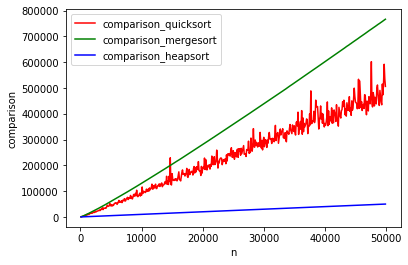

In [6]:
#비교횟수 비교
plt.plot(N, c_q, 'r', label='comparison_quicksort')
plt.plot(N, c_m, 'g', label='comparison_mergesort')
plt.plot(N, c_h, 'b', label='comparison_heapsort')
plt.xlabel('n')
plt.ylabel('comparison')
plt.legend(loc='upper left', ncol=1)
plt.show()

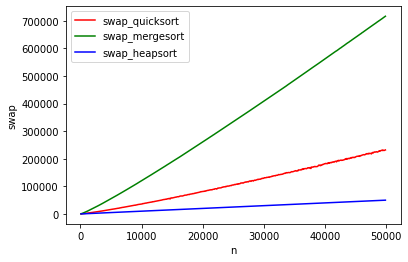

In [7]:
#교환횟수 비교
plt.plot(N, s_q, 'r', label='swap_quicksort')
plt.plot(N, s_m, 'g', label='swap_mergesort')
plt.plot(N, s_h, 'b', label='swap_heapsort')
plt.xlabel('n')
plt.ylabel('swap')
plt.legend(loc='upper left', ncol=1)
plt.show()